In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import statistics

In [ ]:
df=pd.read_csv('données/Irish_synchrone_sample7_train.csv', sep=",")
pd.read_csv('données/Irish_synchrone_sample7_train.csv', sep=",")

In [ ]:
y=df['mean']
x=df[['TempMean','TempMin','TempMax','WindSpeed','WindSpeedMaxS','WindSpeedMaxG','Precip','Posan']]
x_temperature=df[['TempMean','TempMin','TempMax']]
x_wind=df[['WindSpeed','WindSpeedMaxS','WindSpeedMaxG']]
x_wind_temp=df[['WindSpeedMaxS','TempMean','WindSpeed',]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8)

In [ ]:
n_samples_train = x_train.shape[0]
n_samples_test = x_test.shape[0]
n_samples = n_samples_train + n_samples_test
n = x_train.shape[1]
print('n_samples_train / n_samples = {} / {} = {:.2f}'.format(n_samples_train, n_samples, n_samples_train/n_samples))
print('n_samples_train / n_samples = {} / {} = {:.2f}'.format(n_samples_test, n_samples, n_samples_test/n_samples))

In [ ]:
#Reshape nécessaire??
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
"""x_train=np.reshape(x_train, [-1,1])
x_test=np.reshape(x_test, [-1,1])
y_train=np.reshape(y_train, [-1,1])
y_test=np.reshape(y_test, [-1,1])""";

In [ ]:
"""pca = PCA(n_components=9)
pca.fit(x)
print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)
print("Composantes principales : ")
print(pca.components_)""";

In [ ]:
xCR = preprocessing.scale(x)
pcaCR = PCA()
pcaCR.fit(xCR)

ratios = pcaCR.explained_variance_ratio_
print(ratios)
plt.bar(range(len(ratios)), ratios)
plt.xticks(range(len(ratios)))
plt.xlabel("Composante principale")
plt.ylabel("% de variance expliquée")
plt.show()

In [ ]:
X=x
X = preprocessing.scale(X)
X_pca=X
Var=[None for i in range (8)]
for i in range (1,8):
    pca = PCA(i)
    pca.fit(X)
    X_pca = pca.transform(X)
    Var[i]=np.var(X_pca)
plt.scatter(range(8), Var)
plt.xlabel("Nombre de composantes de l'ACP");plt.ylabel("Variance de X");

In [ ]:
#Attention, ca fait laguer et ca plot pas
"""xNt = pcaCR.transform(xCR)
print(xNt[:2,:])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
for i in range(len(df['mean'])):
        x,y = xNt[i,0], xNt[i,1]
        ax.scatter(x,y)
        ax.text(x,y,df['mean'][i])
plt.show()""";

In [ ]:
"""xNt = pca.transform(xCR)
xNt[:2,:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xNt[:,1],xNt[:,2],xNt[:,0])
plt.show()""";

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
"""scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)
"""
nb_composantes=7
pca = PCA(nb_composantes)
print("L'ACP est réalisée avec",nb_composantes,"composantes")
pca.fit(x)
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8)
X_train_PCA = pca.transform(x_train)
X_test_PCA = pca.transform(x_test)

"""NE PAS CHANGER"""
ordre_du_modele=4;"""NE PAS CHANGER"""
"""NE PAS CHANGER"""

poly_reg_model = LinearRegression()

poly = PolynomialFeatures(degree=ordre_du_modele, include_bias=False)
poly_features_train = poly.fit_transform(X_train_PCA)
poly_features_test = poly.fit_transform(X_test_PCA)
poly_reg_model.fit(poly_features_train, y_train)
precision = poly_reg_model.score(poly_features_test, y_test)

poly_max = PolynomialFeatures(degree=ordre_du_modele, include_bias=False)
poly_features_train_max = poly_max.fit_transform(X_train)
poly_features_test_max = poly_max.fit_transform(X_test)
poly_reg_model.fit(poly_features_train_max, y_train)
precision_max= poly_reg_model.score(poly_features_test_max, y_test)
print(precision_max)


#print("La précision du modèle de régression linéaire d'ordre",ordre_du_modele,"est:", round((precision/precision_max)*100),"%")

In [14]:
df=pd.read_csv('données/Irish_synchrone_sample7_train.csv', sep=",")
pd.read_csv('données/Irish_synchrone_sample7_train.csv', sep=",")

,Date,mean,TempMean,TempMin,TempMax,WindSpeed,WindSpeedMaxS,WindSpeedMaxG,Precip,Time,Posan,Instant
0,2010-01-01 00:00:00,0.739667,29.1,24.8,33.8,8.3,12.0,999.9,0.11,8210,1,48
1,2010-01-01 00:30:00,0.695413,29.1,24.8,33.8,8.3,12.0,999.9,0.11,8211,1,1
2,2010-01-01 01:00:00,0.632499,29.1,24.8,33.8,8.3,12.0,999.9,0.11,8212,1,2
3,2010-01-01 01:30:00,0.532436,29.1,24.8,33.8,8.3,12.0,999.9,0.11,8213,1,3
4,2010-01-01 02:00:00,0.453084,29.1,24.8,33.8,8.3,12.0,999.9,0.11,8214,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16603,2010-12-14 21:30:00,0.952058,36.0,28.4,41.5,6.2,8.0,999.9,0.00,24909,347,43
16604,2010-12-14 22:00:00,0.885521,36.0,28.4,41.5,6.2,8.0,999.9,0.00,24910,347,44
16605,2010-12-14 22:30:00,0.882492,36.0,28.4,41.5,6.2,8.0,999.9,0.00,24911,347,45
16606,2010-12-14 23:00:00,0.783505,36.0,28.4,41.5,6.2,8.0,999.9,0.00,24912,347,46


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8)

In [18]:
#Reshape nécessaire??
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
"""x_train=np.reshape(x_train, [-1,1])
x_test=np.reshape(x_test, [-1,1])
y_train=np.reshape(y_train, [-1,1])
y_test=np.reshape(y_test, [-1,1])""";

(13286, 8)
(3322, 8)
(13286,)
(3322,)


[0.40241895 0.29149443 0.11524159 0.10406021 0.06202245 0.01421535
 0.00941638 0.00113063]


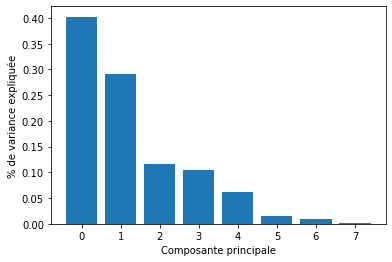

In [20]:
xCR = preprocessing.scale(x)
pcaCR = PCA()
pcaCR.fit(xCR)

ratios = pcaCR.explained_variance_ratio_
print(ratios)
plt.bar(range(len(ratios)), ratios)
plt.xticks(range(len(ratios)))
plt.xlabel("Composante principale")
plt.ylabel("% de variance expliquée")
plt.show()

In [22]:
#Attention, ca fait laguer et ca plot pas
"""xNt = pcaCR.transform(xCR)
print(xNt[:2,:])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
for i in range(len(df['mean'])):
        x,y = xNt[i,0], xNt[i,1]
        ax.scatter(x,y)
        ax.text(x,y,df['mean'][i])
plt.show()""";

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
"""scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)
"""
nb_composantes=7
pca = PCA(nb_composantes)
print("L'ACP est réalisée avec",nb_composantes,"composantes")
pca.fit(x)
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8)
X_train_PCA = pca.transform(x_train)
X_test_PCA = pca.transform(x_test)

"""NE PAS CHANGER"""
ordre_du_modele=4;"""NE PAS CHANGER"""
"""NE PAS CHANGER"""

poly_reg_model = LinearRegression()

poly = PolynomialFeatures(degree=ordre_du_modele, include_bias=False)
poly_features_train = poly.fit_transform(X_train_PCA)
poly_features_test = poly.fit_transform(X_test_PCA)
poly_reg_model.fit(poly_features_train, y_train)
precision = poly_reg_model.score(poly_features_test, y_test)

poly_max = PolynomialFeatures(degree=ordre_du_modele, include_bias=False)
poly_features_train_max = poly_max.fit_transform(X_train)
poly_features_test_max = poly_max.fit_transform(X_test)
poly_reg_model.fit(poly_features_train_max, y_train)
precision_max= poly_reg_model.score(poly_features_test_max, y_test)
print(precision_max)


#print("La précision du modèle de régression linéaire d'ordre",ordre_du_modele,"est:", round((precision/precision_max)*100),"%")

L'ACP est réalisée avec 7 composantes


NameError: name 'X_train' is not defined